In [15]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans

In [16]:
# initialize dataset
N = 441
k = 150
x = []
y = []
np.random.seed(1)

for j in range(0,21):
  for k in range(0,21):
    x.append([-2+0.2*j,-2+0.2*k])

for i in range(0,N):
  f = (x[i][0]**2+x[i][1]**2)
  
  if f <= 1:
    x[i].append(1)
  else:
    x[i].append(-1)

x = np.array(x).reshape(N,3)
# the first two columns represents for the sample data points, and the last column is their label
print(x)

[[-2.  -2.  -1. ]
 [-2.  -1.8 -1. ]
 [-2.  -1.6 -1. ]
 ...
 [ 2.   1.6 -1. ]
 [ 2.   1.8 -1. ]
 [ 2.   2.  -1. ]]


In [17]:
# train/test split with train:test=8:2
pct=0.2
np.random.shuffle(x)
train,test = x[int(N*pct):],x[:int(N*pct)]

# seperate the sampled data points x and the labels y
train_x = train[:,:-1]
test_x = test[:,:-1]

train_y = train[:,-1:]
test_y = test[:,-1:]


In [18]:
# define a class of RBF Neural Network
class RBFNN(object):
  def __init__(self,k,sigma):
    random.seed(1)
    self.k = k
    self.weights = None
    self.sigma = sigma
    self.weights = np.random.randn(k)
    self.centers = None

  def kernel_function(self,x,center):

    return np.exp(-1/(2*self.sigma**2)*np.linalg.norm(x-center)**2);

  # calculate interpolation matrix and return G
  def interpolation_matrix(self,x):
    n = x.shape[0]
       
    G = np.empty((n,self.k))
    for i in range(0,n):
      for j in range(0,k):     
        G[i,j] = self.kernel_function(x[i],self.centers[j])
    return G
  # define different center selection methods
  def select_full(self,x):
    centers = x
    return centers
  
  def select_randomly(self,x):
    n = x.shape[0]

    random_args = np.random.choice(n,k)
    centers = x[random_args]
    return centers

  def select_kmeans(self,x):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(x)
    centers = kmeans.cluster_centers_
    return centers

  def fit_full(self,x,y):
    
    self.centers = self.select_full(x)  
    G = self.interpolation_matrix(x)   
    self.weights = np.dot(np.linalg.pinv(G),y) 
    cost = np.square((np.dot(G,self.weights))-y).mean()
    return cost
  
  def fit_randomly(self,x,y):
    
    self.centers = self.select_randomly(x)  
    G = self.interpolation_matrix(x)
    self.weights = np.dot(np.linalg.pinv(G),y)
    cost = np.square((np.dot(G,self.weights))-y).mean()   
    return cost

  def fit_kmeans(self,x,y):
    
    self.centers = self.select_kmeans(x)  
    G = self.interpolation_matrix(x)
    self.weights = np.dot(np.linalg.pinv(G),y)
    cost = np.square((np.dot(G,self.weights))-y).mean()
    return cost

  def predict(self,x,y):
    G = self.interpolation_matrix(x)  
    pred = np.dot(G,self.weights)
    pred = np.sign(pred)
    accuracy = (pred==y).mean()*100
    return accuracy
  
  def __del__(self):

    self.weights = None
    self.centers = None
      

In [19]:
train_accuracy_list_full = []
train_accuracy_list_random = []
train_accuracy_list_kmeans = []

accuracy_list_full = []
cost_list_full = []
accuracy_list_random = []
cost_list_random = []
accuracy_list_kmeans = []
cost_list_kmeans = []
sigmas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,20]

In [20]:

def part1_b():
  # Perform the design of the RBF NN, using all training datapoints

    for sigma in sigmas:     
      rbf_full = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_full.fit_full(train_x,train_y)
      acc_1 = rbf_full.predict(train_x,train_y)
      acc_2 = rbf_full.predict(test_x,test_y)

      train_accuracy_list_full.append(acc_1) 
      accuracy_list_full.append(acc_2) 
      cost_list_full.append(cost_2)

    del rbf_full
    
part1_b()


In [21]:
def part2_b():
  # Perform the design of the RBF NN, using this time only 150 centers
  # Kmeans implementation
    for sigma in sigmas:     
      rbf_kmeans = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_kmeans.fit_kmeans(train_x,train_y)
      acc_1 = rbf_kmeans.predict(train_x,train_y)
      acc_2 = rbf_kmeans.predict(test_x,test_y)

      train_accuracy_list_kmeans.append(acc_1) 
      accuracy_list_kmeans.append(acc_2) 
      cost_list_kmeans.append(cost_2)

    del rbf_kmeans
    
part2_b()


In [22]:
def part2_a():
  # Perform the design of the RBF NN, using this time only 150 centers
  # Randomly select the centers from the input data
    for sigma in sigmas:     
      rbf_random = RBFNN(k=150,sigma=sigma)
      
      cost_2 = rbf_random.fit_randomly(train_x,train_y)
      acc_1 = rbf_random.predict(train_x,train_y)
      acc_2 = rbf_random.predict(test_x,test_y)

      train_accuracy_list_random.append(acc_1) 
      accuracy_list_random.append(acc_2) 
      cost_list_random.append(cost_2)
    del rbf_random
    
part2_a()


<function matplotlib.pyplot.show(close=None, block=None)>

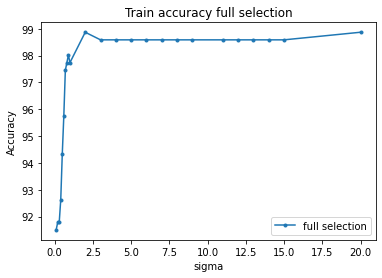

In [23]:
# 
plt.plot(sigmas,train_accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy full selection')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

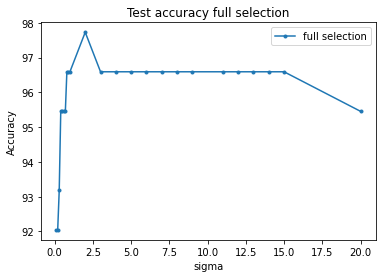

In [24]:
# 
plt.plot(sigmas,accuracy_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy full selection')
plt.legend()
plt.show


In [ ]:
RBF uses a nonlinear transformation in the hidden layer transforms low dimensional space to high dimensional space such that it can be easily classified. The non linear transformation applied in this problem as the gaussian function. The RBFN uses unsupervised method to determine the centers and supervised method to calculate the weights.

From the implementation and the graph obtained, in this case the accuracy of 97.8% is obtained when sigma value is 2, but during multiple random runs it is noted that variying sigma values network didn't perform consistently. The reason behind this is that smaller width didn't provide good interpolation of the function in between sample points.

However, a sigma value of 3 and 16 provided a good accuracy consistently. In this implementation an accuracy of 97.8% is obtained when sigma value is 2 . This shows that when sigma is 2. an adequate interpolation property is provided to the network.

In this particular case, even large value of sigma also performs better, but this is not ideal for all runs as there could be loss of information when the ranges of the radial functions are further away from
the original range of the function. It is also noted that since it is a exponential function after a spread value of 20 the accuracy almost saturates.

Thus by the mentioned analysis, I have chosen a mid range sigma value of 2 with accuracy of 97.8% as my optimal width value. 

<function matplotlib.pyplot.show(close=None, block=None)>

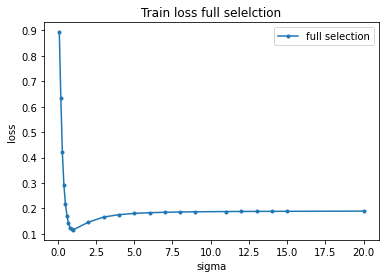

In [25]:
plt.plot(sigmas,cost_list_full,marker='.',label="full selection")
plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss full selelction')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

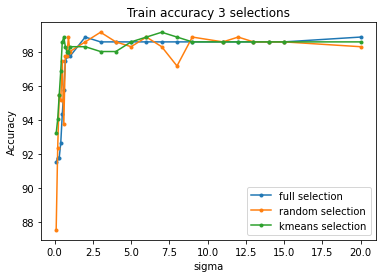

In [26]:
#plot
plt.plot(sigmas,train_accuracy_list_full,marker='.',label="full selection")
plt.plot(sigmas,train_accuracy_list_random,marker='.',label="random selection")
plt.plot(sigmas,train_accuracy_list_kmeans,marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

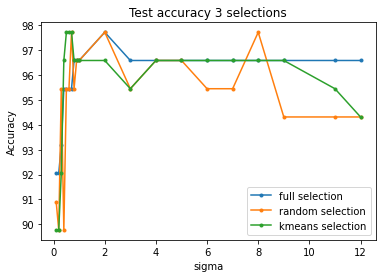

In [27]:
#plot
plt.plot(sigmas[:20],accuracy_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],accuracy_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],accuracy_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy 3 selections')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

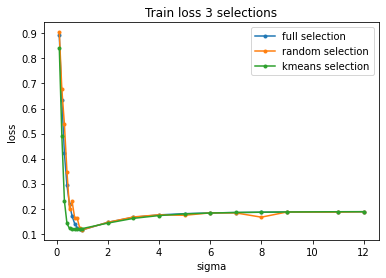

In [28]:
#plot
plt.plot(sigmas[:20],cost_list_full[:20],marker='.',label="full selection")
plt.plot(sigmas[:20],cost_list_random[:20],marker='.',label="random selection")
plt.plot(sigmas[:20],cost_list_kmeans[:20],marker='.',label="kmeans selection")

plt.xlabel('sigma')
plt.ylabel('loss')
plt.title('Train loss 3 selections')
plt.legend()
plt.show

In [ ]:
From the results obtained due to random intilization of 150 centers from the entire 352 training data, based on the random center selection it sometimes performs better than Kmeans center or some times performs less compared to Kmeans and same sometimes, but the difference in accuracy for kmeans and random 150 center initialization is very less.

For optimal performace the hidden layer (i.e) the number of non linear transformation used should be equal to the input data. Too sparse function can cause degradation of the network performance. This can be visualized in the implementation as when the hidden layer is spanned across the input dataspace, the accuracy obtained when sigma value 2 is 97.8% and when hidden layer was 150 the network performance remained same 97.8% for random centers and 96.5% for k means center for the same sigma value.

The main intution behind RBF is transforming low dimensional data to high dimensional space for better linear seperability (i.e) higher the dimension better the network performance, and the ideal multi dimensional space for projecting the data is the same as the input dataspace (ie) the number of sample. Hence when the entire training data is considered as centers possibility of better linear seperation of datapoints is possible due to higher dimension than compared to 150 centers. This claim is supported by the results obtained.